# Extraction of regular grid (NumPy array) from unstructed grid (.vtu)

For a quantitative analysis of numerical models, it is often advantageous to have the data on regular grid, so that we can easily apply matrix transformations, image processing or machine learning tools. This tutorial describes how to use paraview's efficient interpolation to convert our models from an unstructured to a structured grid.

(1) Open paraview to read off the size of the model in the red box below:

![](Capture1.PNG)

(2) Create a regular grid with these dimensions using this script:

In [1]:
from pyevtk.hl import gridToVTK
import numpy as np 

# Dimensions
nx, ny, nz = 1000, 1000, 10
lx, ly, lz = 0.1, 0.1, 0.0148067
dx, dy, dz = lx/nx, ly/ny, lz/nz 
ncells = nx * ny * nz
npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Coordinates
x = np.arange(0, lx + 0.1*dx, dx, dtype='float64')
y = np.arange(0, ly + 0.1*dy, dy, dtype='float64')
z = np.arange(0, lz + 0.1*dz, dz, dtype='float64')

gridToVTK("./box", x, y, z) 

'C:\\Users\\thilo\\box.vtr'

(3) Load the this grid ('box.vtr') in paraview:

![](Capture2.png)

(4) Resample the model using the grid using the paraview filter 'Resample with Dataset'. Select both your irregular grid as 'Source Data Arrays' and your regular grid as 'Destination Mesh'. The result would looks something like this:

![](Capture3.png)

(5) Save the regular gridded data as a .vtk file and choose the properties to write:

![](Capture4.png)

(6) Load the .vtk file in python:

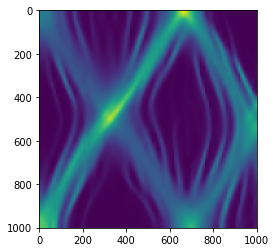

In [6]:
import matplotlib.pyplot as plt
import meshio
mesh = meshio.read('grid.vtk')

nx, ny, nz = 1000, 1000, 10

x = mesh.points[:,0].reshape(nz+1, nx+1, ny+1)
y = mesh.points[:,1].reshape(nz+1, nx+1, ny+1)
z = mesh.points[:,2].reshape(nz+1, nx+1, ny+1)

strain = mesh.point_data['strain_rate'].reshape(nz+1, nx+1, ny+1)

plt.imshow(strain[5,:,:])